# Computation speed

In this notebook, we tested the average computation speed for various models in different cases.
___

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from specs_utils import get_specs
get_specs()

Spec,Value
Machine,x86_64
Platform,Linux-5.4.0-39-generic-x86_64-with-glibc2.29
Architecture,"(64bit, ELF)"
Cores,Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz
Number of cores,8
Python version,3.8.2


In [3]:
def test_model(Model, n):
    
    init_time = list()
    encode_time = list()
    decode_time = list()
    total_time = list()
    
    # Iterations for computing mean and standard deviation
    iterations = 50
    
    for i in range(1,iterations + 1):
        # Initialization
        start_process = time.time()
        model = Model(n,1)
        # Encoding
        start_encode = time.time()
        for dim in range(1, model.n+1):
            model.encode(.5, dim)
        # Decoding
        start_decode = time.time()
        result = model.decode()
        end_process = time.time()
        
        # Store timings
        init_time.append(start_encode - start_process)
        encode_time.append(start_decode - start_encode)
        decode_time.append(end_process - start_decode)
        total_time.append(end_process - start_process)
        
    return [n,
            np.mean(init_time), 
            np.mean(encode_time), 
            np.mean(decode_time), 
            np.mean(total_time), 
            np.std(total_time)]

def plot_results(df, title="Model"):
    """Plot all the results"""
    
    # Total timewith STD
    fig = plt.figure(figsize=(15,6), dpi=150)

    df.plot(x ='n', y=[4], yerr="Total STD", uplims=True, lolims=True, kind = 'line', color="r", ax = plt.gca())
    plt.title(f"{title} - Total time with STD")

    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
    plt.minorticks_on()

    plt.show()
    
    # Timings insight
    fig = plt.figure(figsize=(15,6), dpi=150)

    df.plot(x ='n', y=[1,2,3,4], kind = 'line',  ax = plt.gca())
    plt.title(f"{title} - Timings insight")

    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
    plt.minorticks_on()

    plt.show()
                
    # Zooming in
    print("Zooming in:")
    fig = plt.figure(figsize=(15,6), dpi=150)

    df.plot(x ='n', y=[1,2], kind = 'line', ax=plt.subplot(1,2,1))
    plt.title("Initialization and encoding only")
    
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
    plt.minorticks_on()

    ax = plt.subplot(1,2,2)
    df[1:19].plot(x ='n', y=[1,2,3], kind = 'line', ax=ax)
    df[1:19].plot(x ='n', y=[4], yerr="Total STD", kind = 'line', ax=ax)
    plt.title("Showing results for n < 20")
    
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
    plt.minorticks_on()

    plt.show()

___
## AngularModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [4]:
from qrobot.models import AngularModel
max_n = 26

In [5]:
table = list()

for n in range(1,max_n+1):
    print(f"Testing n={n}", end="\r")
    table.append(test_model(AngularModel, n))
print("             ")

df_angular = pd.DataFrame(table, columns=["n","Initialization", "Encode", "Decode", "Total", "Total STD"])

Plotting the results:

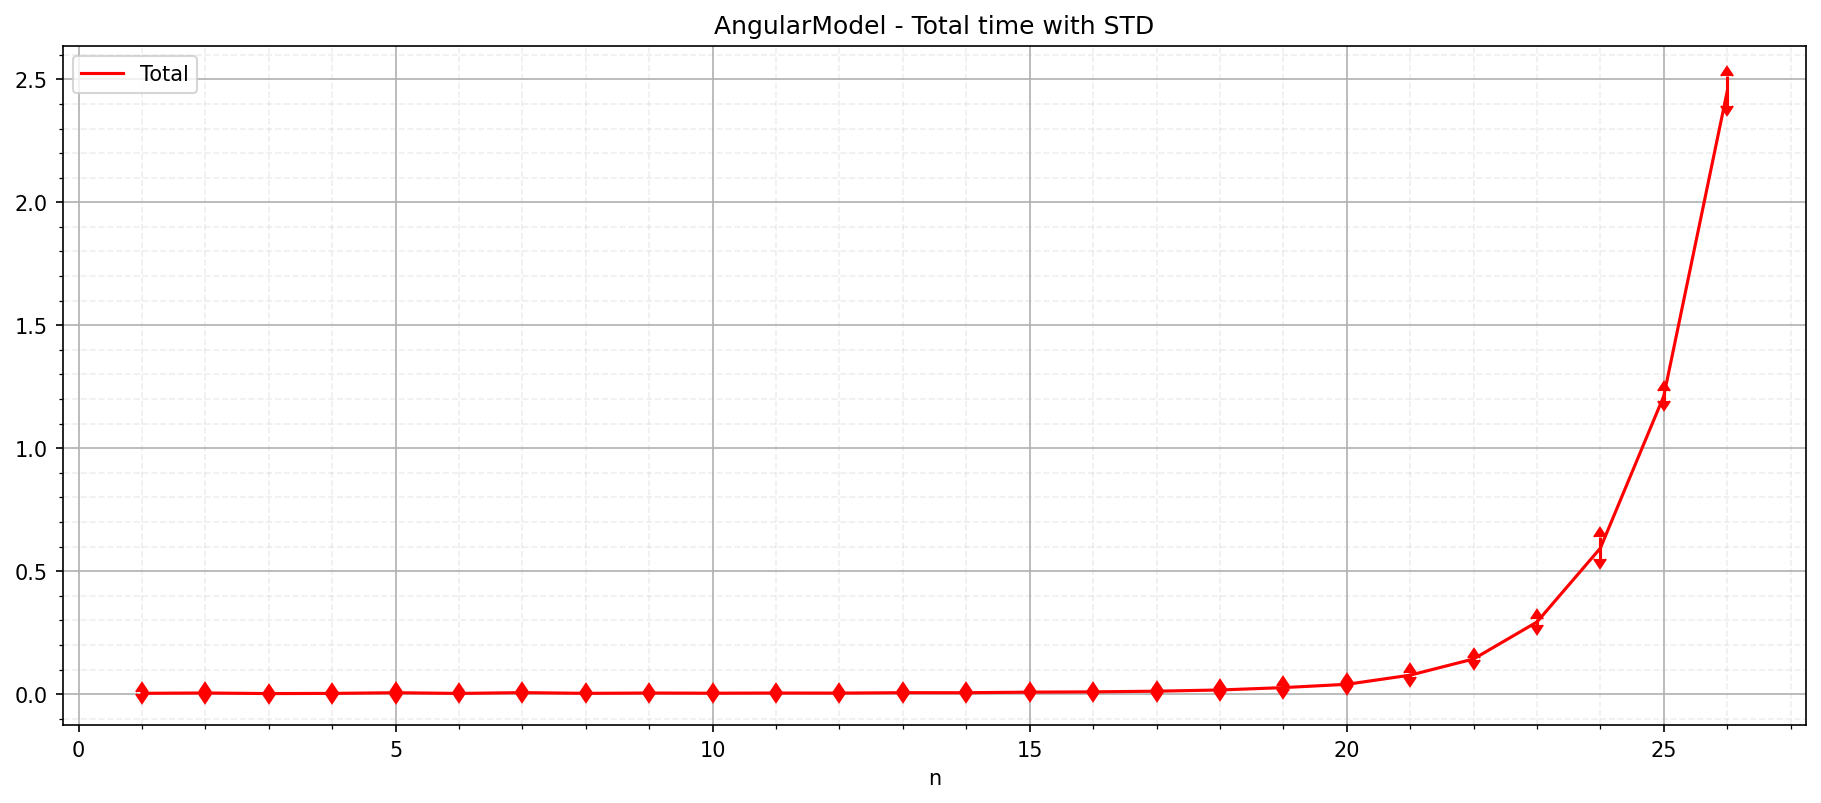

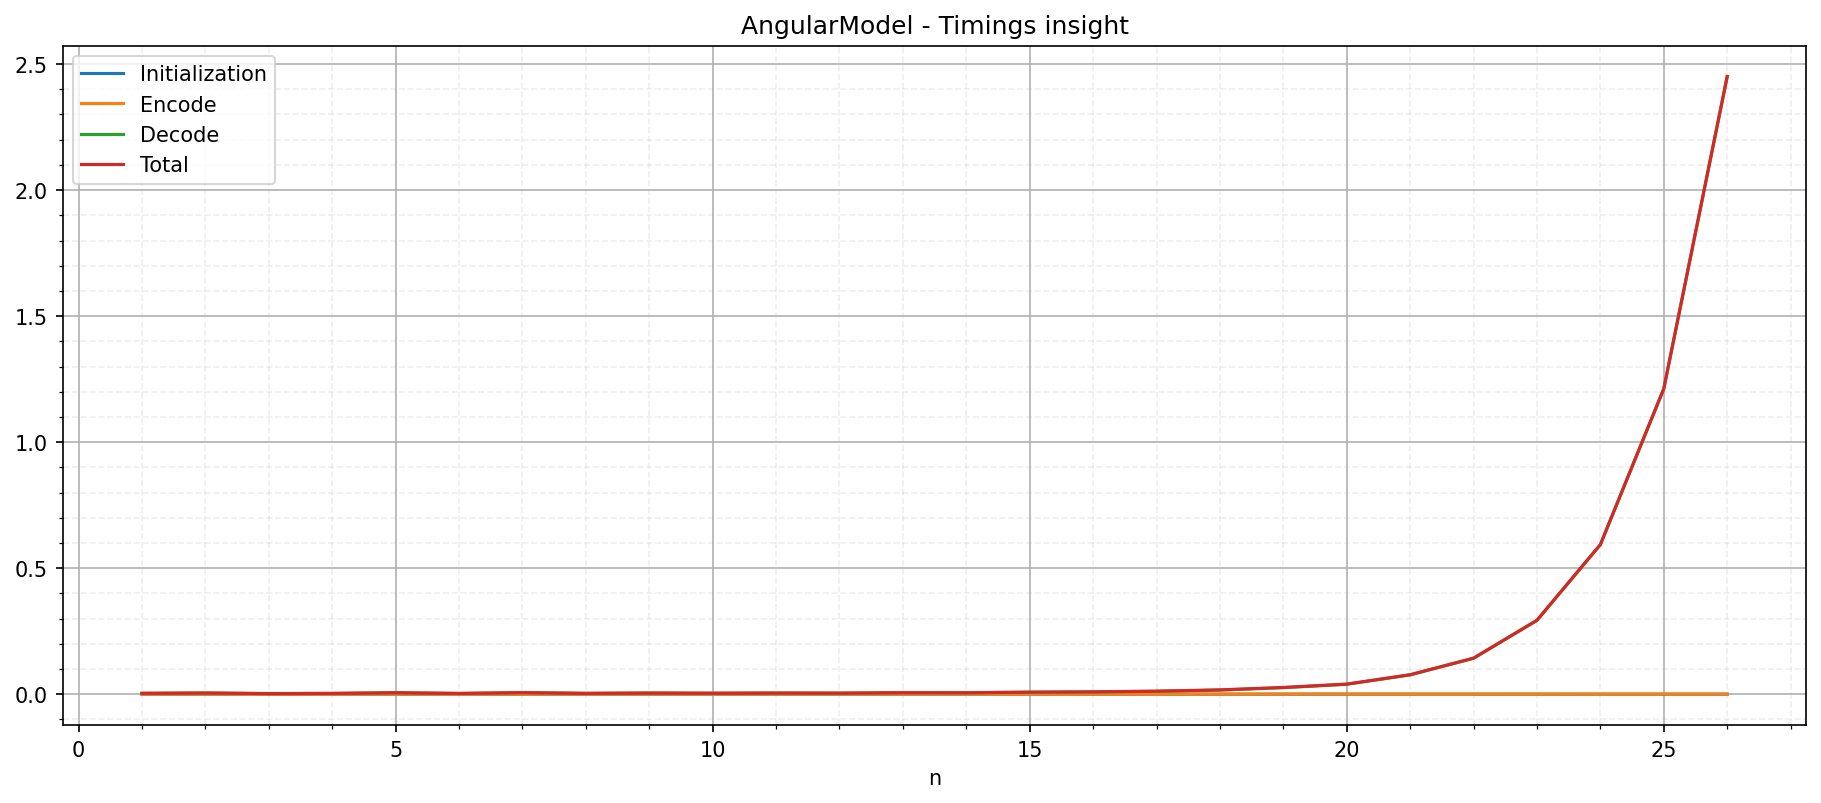

Zooming in:


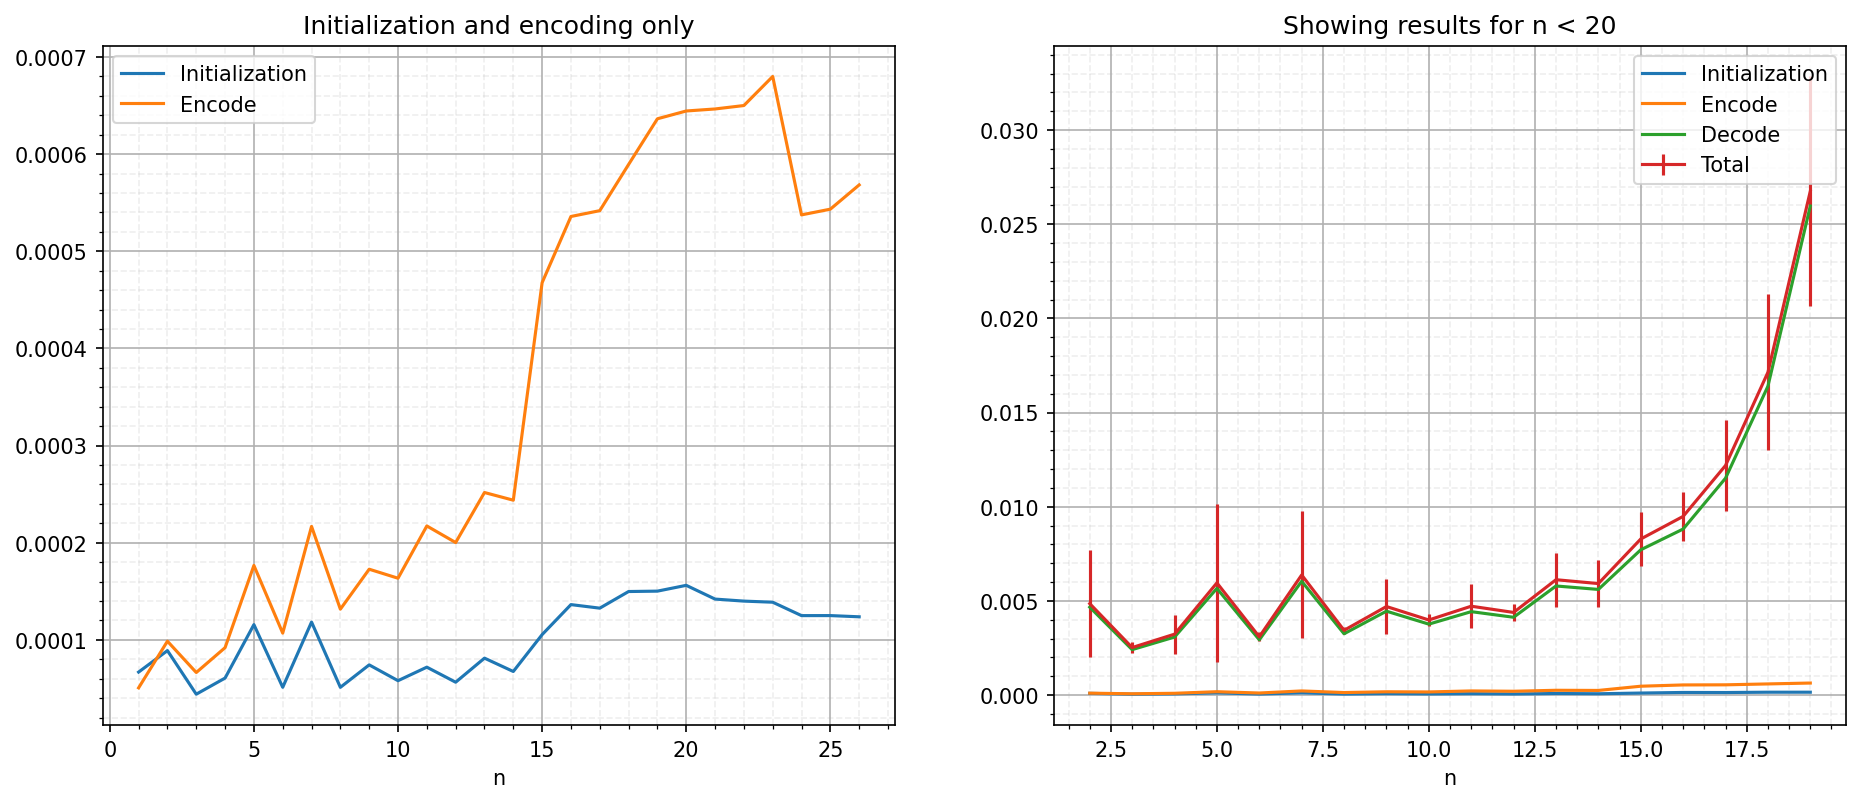

In [6]:
plot_results(df_angular, "AngularModel")

Numerical values:

In [7]:
df_angular

,n,Initialization,Encode,Decode,Total,Total STD
0,1,0.000067,0.000051,0.003473,0.003591,0.003629
1,2,0.000089,0.000099,0.004666,0.004853,0.002834
2,3,0.000044,0.000066,0.002410,0.002521,0.000275
3,4,0.000061,0.000092,0.003078,0.003231,0.001038
4,5,0.000116,0.000177,0.005662,0.005955,0.004182
5,6,0.000051,0.000107,0.002933,0.003091,0.000244
6,7,0.000118,0.000217,0.006040,0.006375,0.003373
7,8,0.000051,0.000132,0.003252,0.003435,0.000197
8,9,0.000074,0.000173,0.004452,0.004699,0.001462
9,10,0.000058,0.000163,0.003764,0.003985,0.000332


___
## LinearModel
We test the initialization, encode and decode time for a input of .5 on each dimension, for increasing dimensions ($n \in [0,26]$)

In [8]:
from qrobot.models import LinearModel
max_n = 26

In [9]:
table = list()

for n in range(1,max_n+1):
    print(f"Testing n={n}", end="\r")
    table.append(test_model(LinearModel, n))
print("             ")


df_linear = pd.DataFrame(table, columns=["n","Initialization", "Encode", "Decode",  "Total", "Total STD"])

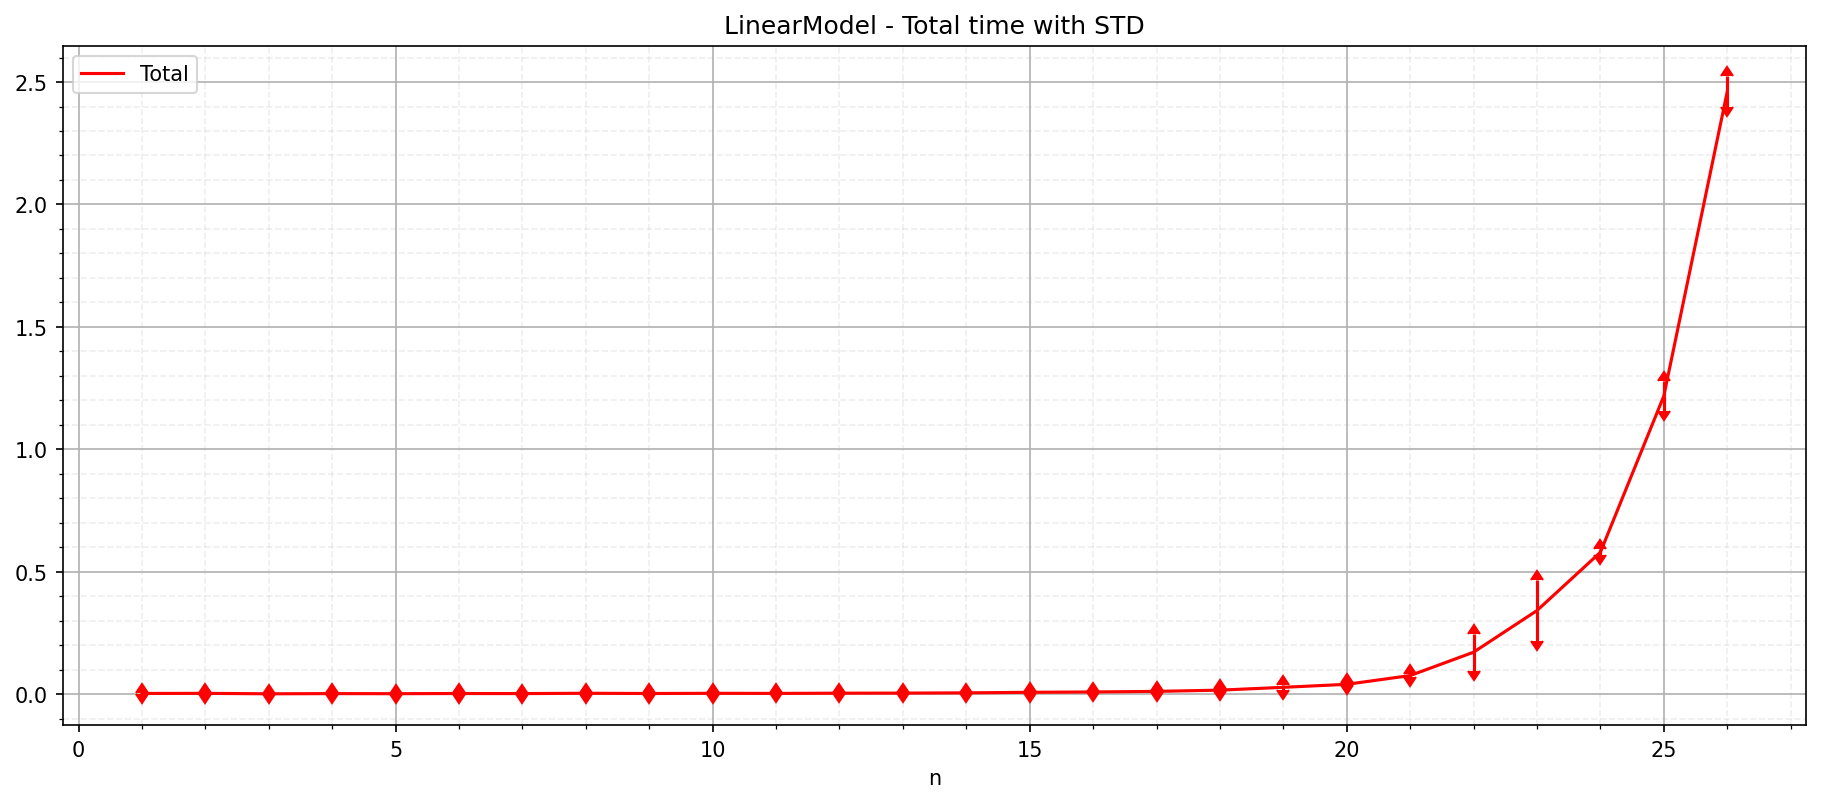

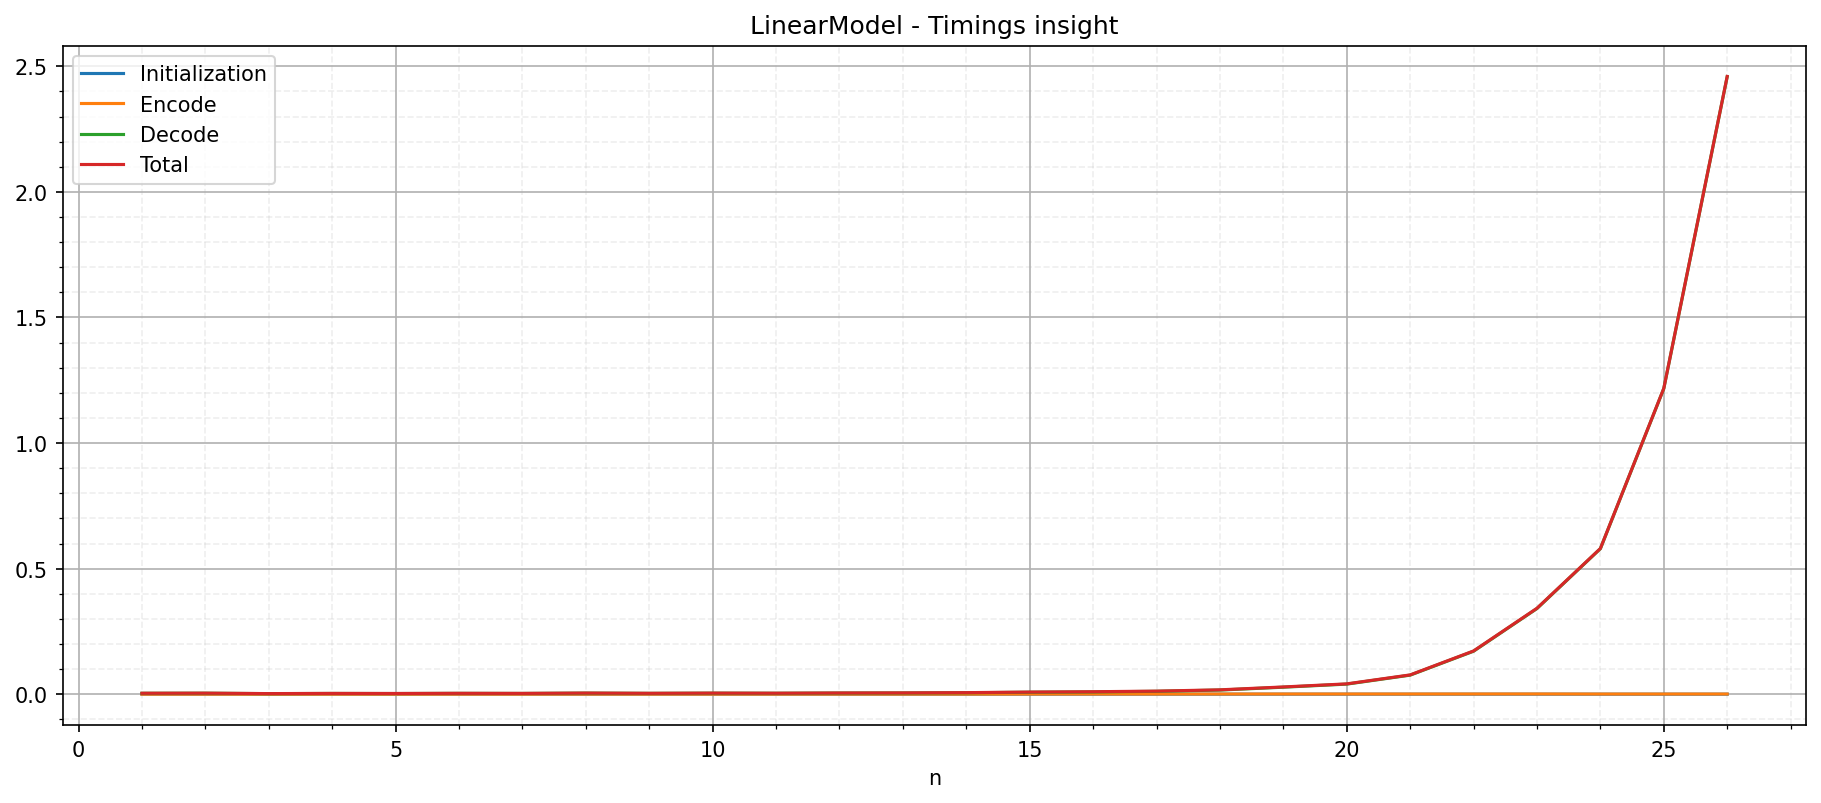

Zooming in:


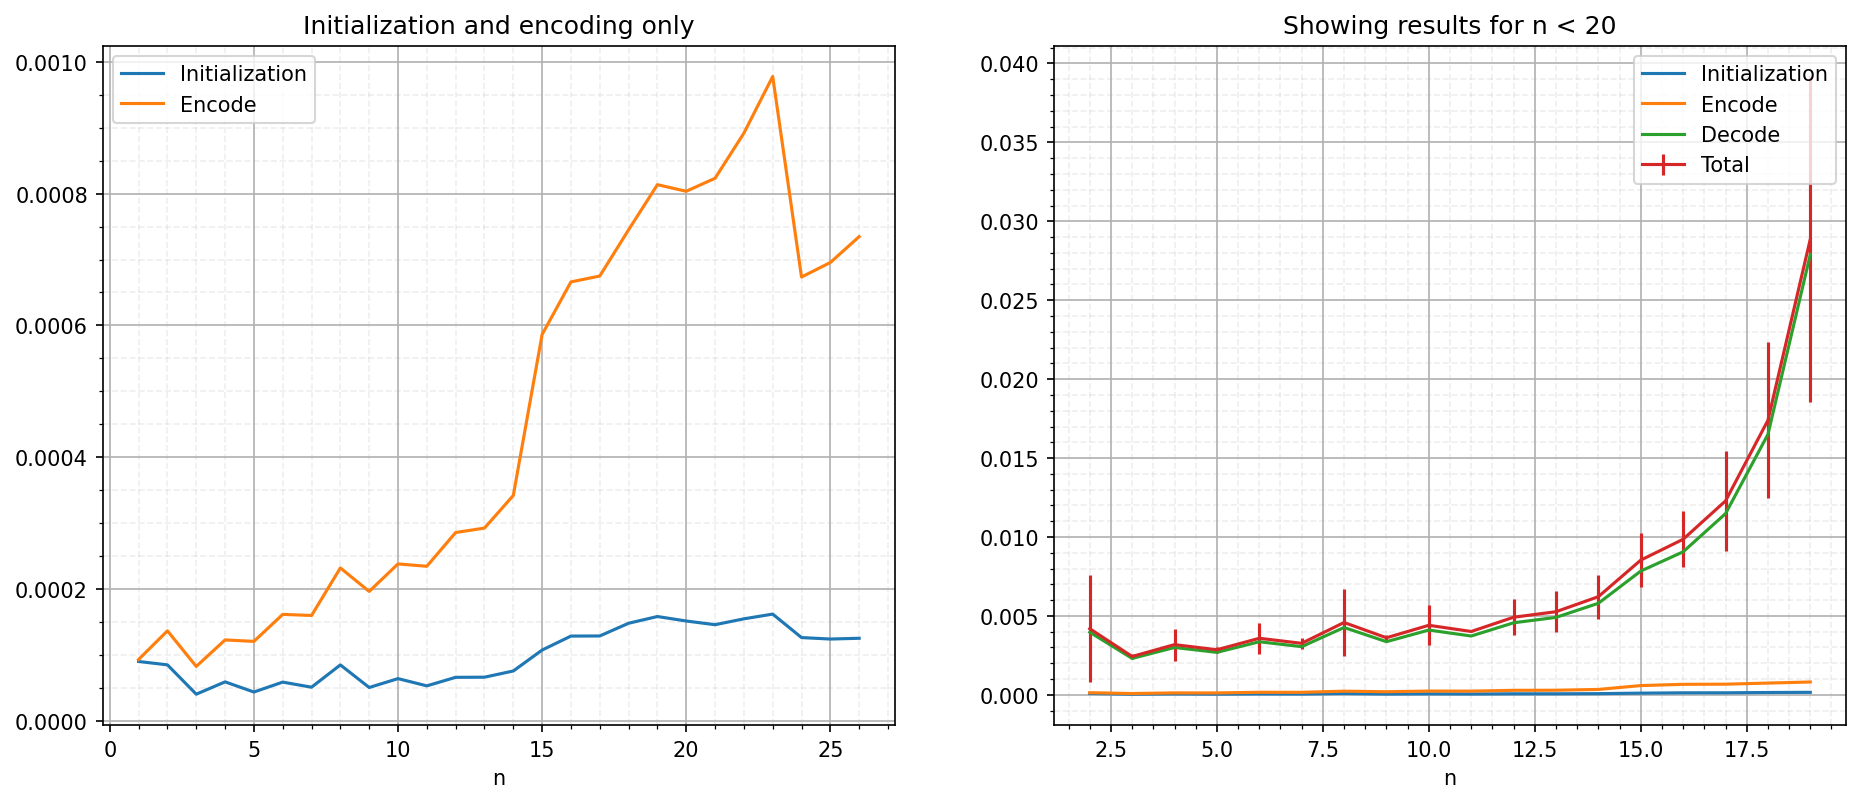

In [10]:
plot_results(df_linear, "LinearModel")

In [11]:
df_linear

,n,Initialization,Encode,Decode,Total,Total STD
0,1,0.000090,0.000093,0.003668,0.003851,0.001905
1,2,0.000085,0.000137,0.003969,0.004190,0.003386
2,3,0.000040,0.000083,0.002307,0.002430,0.000130
3,4,0.000059,0.000123,0.002999,0.003181,0.001008
4,5,0.000044,0.000120,0.002692,0.002856,0.000175
5,6,0.000059,0.000161,0.003363,0.003583,0.000969
6,7,0.000051,0.000160,0.003054,0.003264,0.000340
7,8,0.000085,0.000232,0.004267,0.004583,0.002116
8,9,0.000051,0.000196,0.003368,0.003615,0.000159
9,10,0.000064,0.000238,0.004104,0.004406,0.001274


__
## Comparison

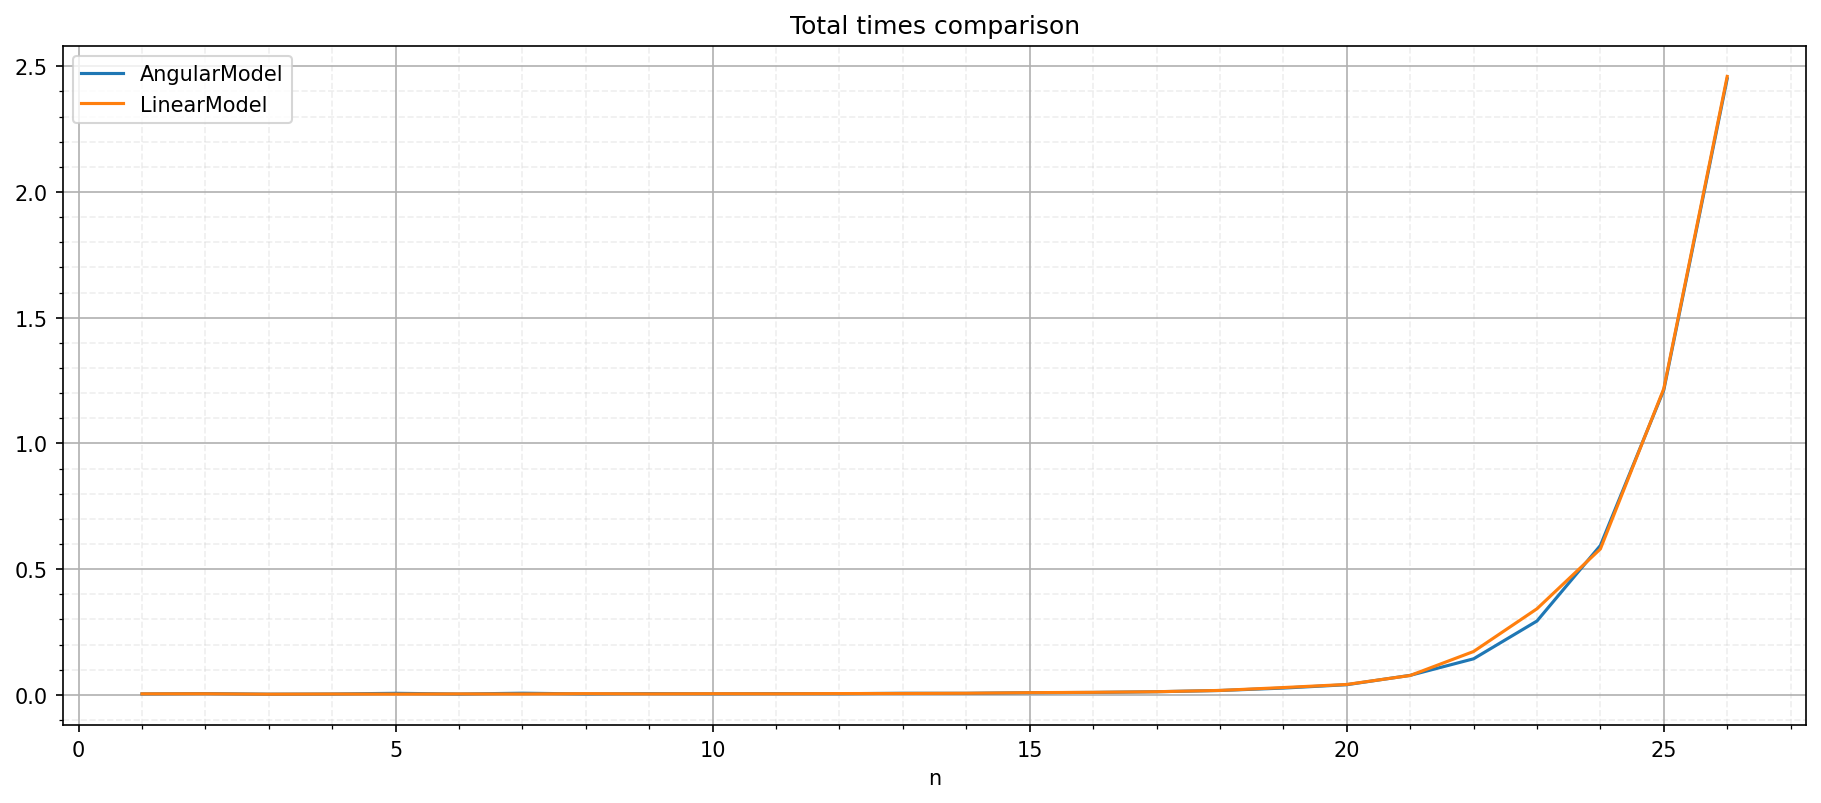

In [12]:
fig = plt.figure(figsize=(15,6), dpi=150)

df_angular.plot(x ='n', y=[4], kind = 'line', ax = plt.gca())
df_linear.plot(x ='n', y=[4], kind = 'line', ax = plt.gca())
plt.legend(["AngularModel","LinearModel"])
plt.title("Total times comparison")

plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
plt.minorticks_on()

plt.show()

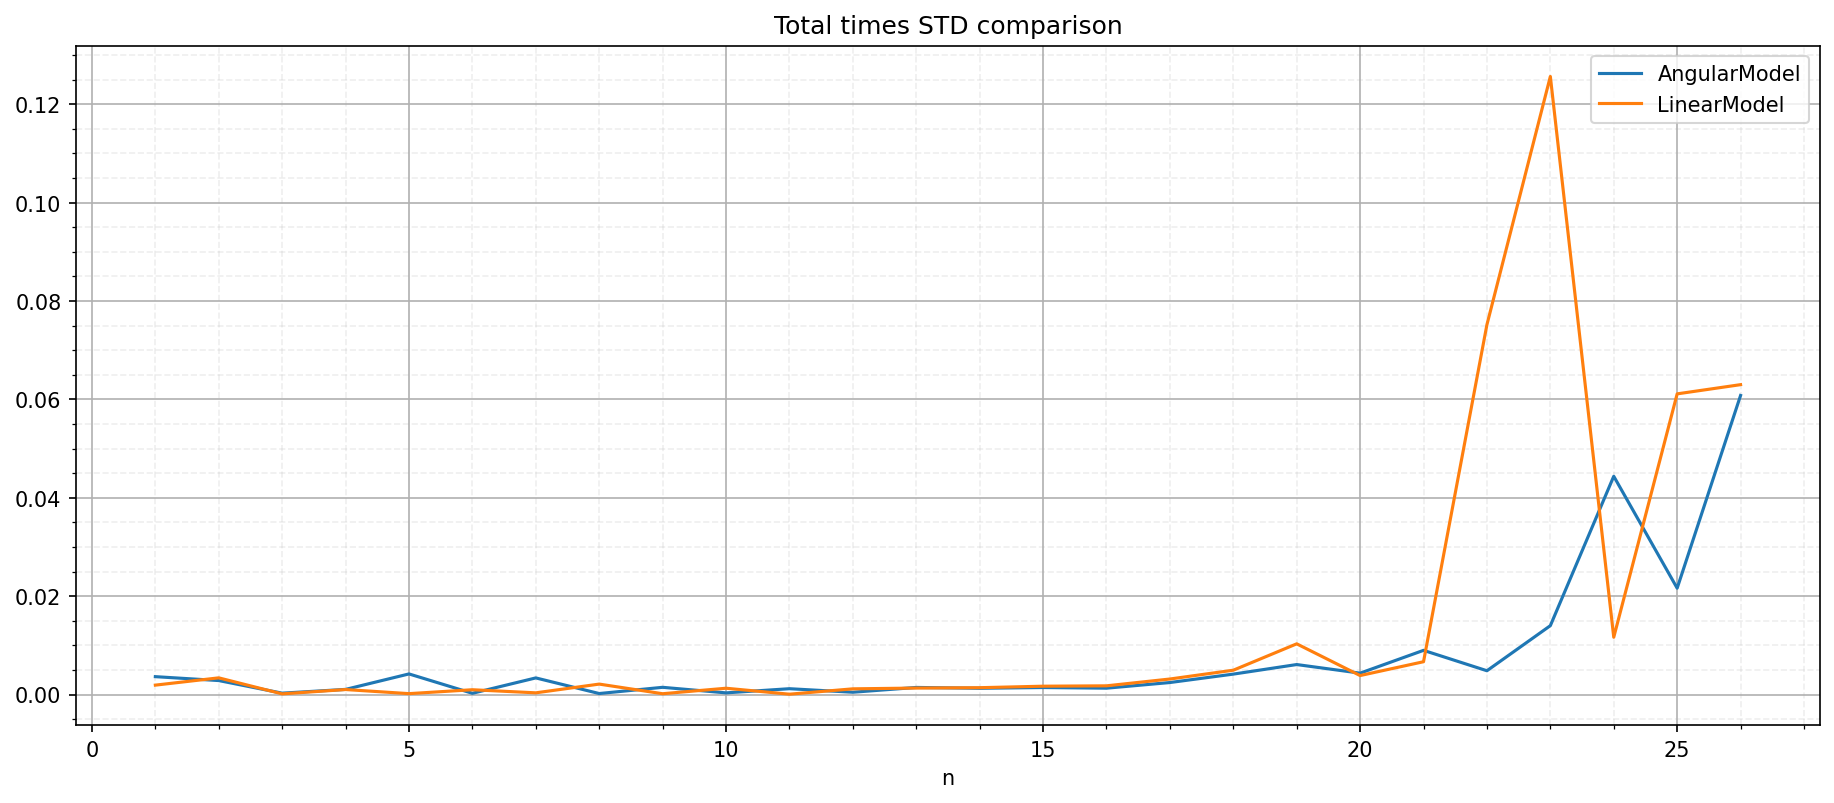

In [13]:
fig = plt.figure(figsize=(15,6), dpi=150)

df_angular.plot(x ='n', y=[5], kind = 'line', ax = plt.gca())
df_linear.plot(x ='n', y=[5], kind = 'line', ax = plt.gca())

plt.legend(["AngularModel","LinearModel"])
plt.title("Total times STD comparison")

plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
plt.minorticks_on()

plt.show()

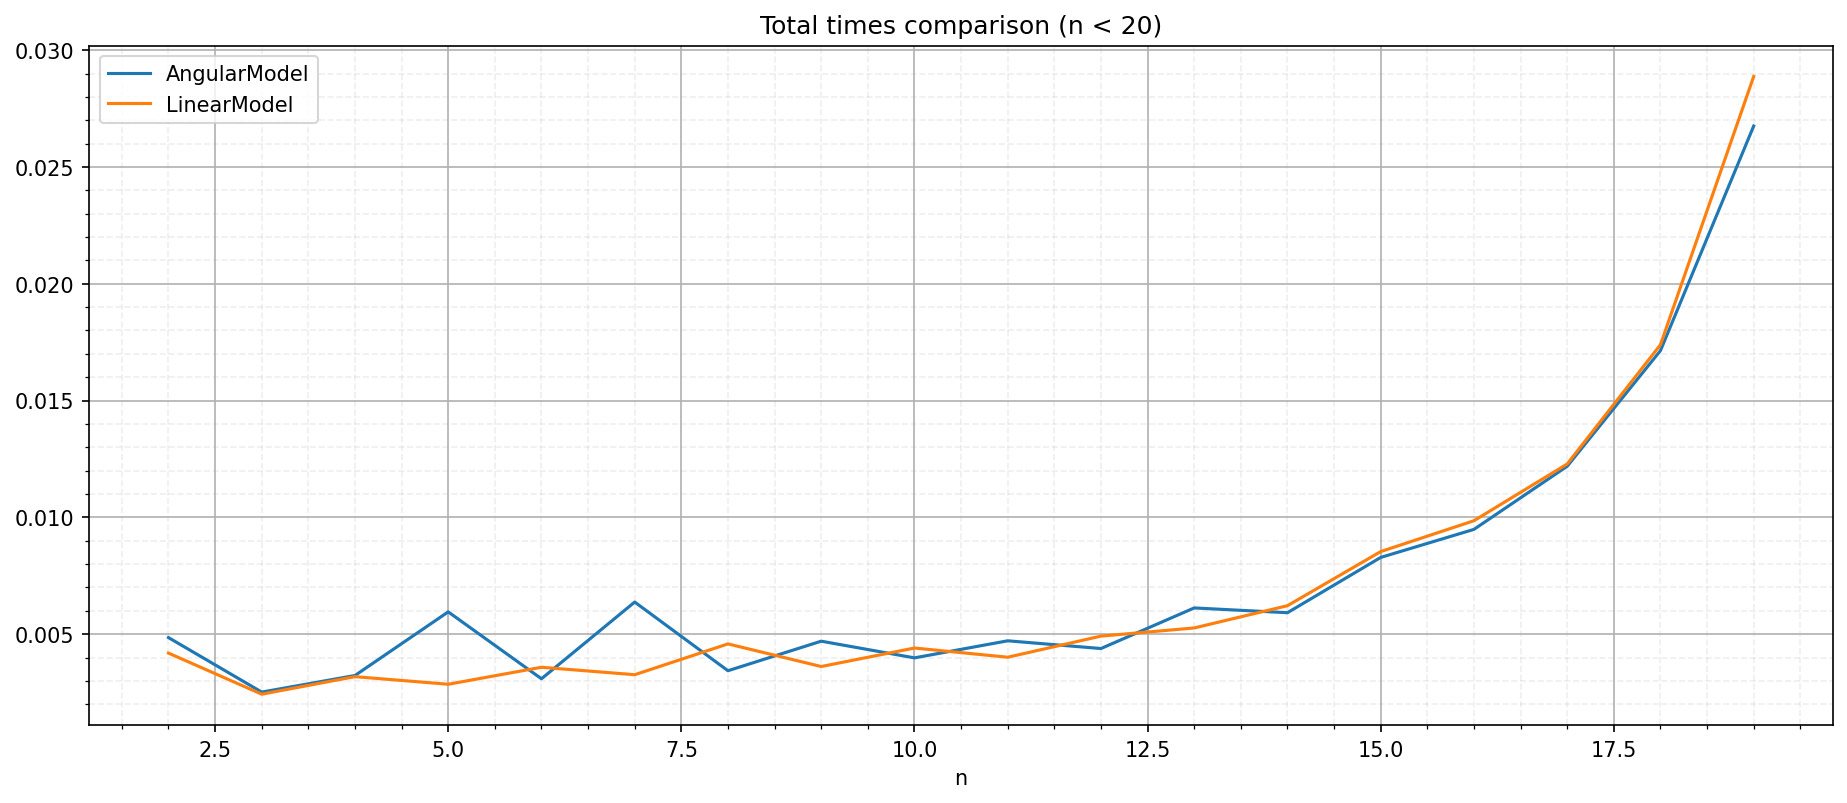

In [14]:
fig = plt.figure(figsize=(15,6), dpi=150)

df_angular[1:19].plot(x ='n', y=[4], kind = 'line', ax = plt.gca())
df_linear[1:19].plot(x ='n', y=[4], kind = 'line', ax = plt.gca())

plt.legend(["AngularModel","LinearModel"])
plt.title("Total times comparison (n < 20)")

plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--', alpha=0.2)
plt.minorticks_on()

plt.show()